In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction to Scientific Programming in Python
## Lecture 8b: Time Data and Time Series Analysis

# Datetimes: Core Python

## The Datetime Package has a Datetime Type
```python
datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
```

In [2]:
from datetime import datetime
datetime(year=2016, month=6, day=6, 
         hour=12, minute=3, second=5, microsecond=1)
# now = datetime.now()

## Datetime Properties and Methods

In [3]:
now = datetime.now()
now.hour, now.year

(13, 2016)

In [4]:
now.weekday(), now.isoformat()

(1, '2016-06-07T13:23:00.791760')

## Datetimes can be printed and read nicely

In [5]:
str(datetime.now())

'2016-06-07 13:23:00.821273'

In [6]:
datetime.now().strftime('It is %H:%M, on %h %d, %Y.')

'It is 13:23, on Jun 07, 2016.'

In [7]:
datetime.strptime('1.14.86', '%m.%d.%y')

datetime.datetime(1986, 1, 14, 0, 0)

In [8]:
%%HTML
<iFrame src="https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior" width=900 height400></iFrame>

## Datetime Math produces TimeDeltas

In [9]:
now = datetime.now()
christmas = datetime(2016, 12, 25, 0, 0, 0)
christmas - now

datetime.timedelta(200, 38219, 125625)

In [10]:
str(christmas - now)

'200 days, 10:36:59.125625'

## TimeDeltas Can Also Be Created Directly

In [11]:
from datetime import timedelta
a_day = timedelta(days=1)
now + a_day

datetime.datetime(2016, 6, 8, 13, 23, 0, 874375)

In [12]:
a_day.days, a_day.resolution

(1, datetime.timedelta(0, 0, 1))

## Dates and Times can also be Created Seperately

In [13]:
from datetime import date, time
date(2015, 4, 5), time(4, 2, 1)

(datetime.date(2015, 4, 5), datetime.time(4, 2, 1))

In [14]:
print(date(2015, 4, 5), 'and', time(4, 2, 1))

2015-04-05 and 04:02:01


## Caution: There is also a different Time package, which is for measuring time passing on the computer, not representing data!

In [15]:
import time
time.clock()

1.15702

In [16]:
print('waiting...', end='')
time.sleep(2)
print('done!', end='')

waiting...done!

# Datetime in NumPy, and Pandas

## NumPy has a Datetime64 dtype, converted from strings

In [17]:
np.datetime64('2015-04-09') + 12

numpy.datetime64('2015-04-21')

In [18]:
mins = np.array([str(datetime.now() + timedelta(seconds=el)) for el in range(100)],
               dtype=np.datetime64)
mins[:3]

array(['2016-06-07T13:23:02.960833+0200',
       '2016-06-07T13:23:03.960867+0200', '2016-06-07T13:23:04.960878+0200'], dtype='datetime64[us]')

## Pandas Uses NumPy's Datetime dtype
However, hdf5 files don't understand datetimes, so we need to convert after reading.

In [19]:
data = pd.read_hdf('rel_data.h5', 'behav')
data.head()

,Time,X,Y,Z,Session
0,136.783342,-0.168612,0.497566,-0.384482,1448890319922000000
100,137.616675,-0.146270,0.289156,-0.308755,1448890319922000000
200,138.450009,-0.043644,0.256933,-0.290230,1448890319922000000
300,139.283342,0.060798,0.259256,-0.454783,1448890319922000000
400,140.116676,-0.051600,0.284099,-0.572804,1448890319922000000


### After Conversion...

In [20]:
data['Session'] = pd.DatetimeIndex(data['Session'])
data.head()

,Time,X,Y,Z,Session
0,136.783342,-0.168612,0.497566,-0.384482,2015-11-30 13:31:59.922
100,137.616675,-0.146270,0.289156,-0.308755,2015-11-30 13:31:59.922
200,138.450009,-0.043644,0.256933,-0.290230,2015-11-30 13:31:59.922
300,139.283342,0.060798,0.259256,-0.454783,2015-11-30 13:31:59.922
400,140.116676,-0.051600,0.284099,-0.572804,2015-11-30 13:31:59.922


## Experiment Time is More Accurately Described As a TimeDelta

In [21]:
data_t = data.copy()
data_t['Time'] = pd.to_datetime(data['Time'], unit='s')
data_t = data_t.set_index('Time')
data_t.head()

,X,Y,Z,Session
Time,,,,
1970-01-01 00:02:16.783342,-0.168612,0.497566,-0.384482,2015-11-30 13:31:59.922
1970-01-01 00:02:17.616675,-0.146270,0.289156,-0.308755,2015-11-30 13:31:59.922
1970-01-01 00:02:18.450009,-0.043644,0.256933,-0.290230,2015-11-30 13:31:59.922
1970-01-01 00:02:19.283342,0.060798,0.259256,-0.454783,2015-11-30 13:31:59.922
1970-01-01 00:02:20.116676,-0.051600,0.284099,-0.572804,2015-11-30 13:31:59.922


## Plotting Data with Time Axis

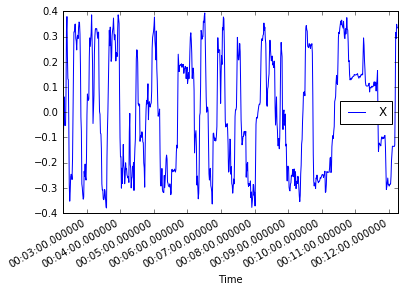

In [22]:
sess = data_t[data_t['Session'] == data_t.ix[0, 'Session']]
fg, ax = plt.subplots()
sess.plot(y='X', ax=ax)
# tick_labels = ax.xaxis.major.formatter.seq
# ax.xaxis.major.formatter.seq = [label.split(':')[-1] if label else "" for label in tick_labels]

## Resampling Data

<class 'pandas.tseries.resample.DatetimeIndexResampler'>


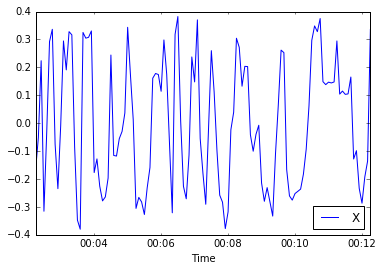

In [23]:
resampler = sess.resample('5s')
print(type(resampler))
sess_r = resampler.bfill()
sess_r.head()
sess_r.plot(y='X')  # Timedeltas seem to still have some bugs regarding plotting

In [24]:
del sess['Session']

## Rolling Mean: rolling() works like agg() 

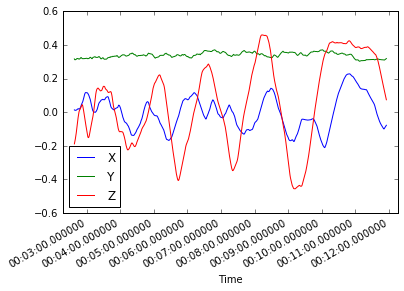

In [26]:
sess_rm = sess.rolling(window=50, center=True).mean()
sess_rm.head(10)
sess_rm.plot()

## Conclusions
  - Timeseries Analysis Works in Tabular Data
  - Datetime and TimeDelta Representation has nice features, but still Needs to be fully implemented in Numpy and Pandas

## Discussion/Questions